
# Implementing Logistic Regression Algorithm with NumPy

## Introduction

Despite its name, logistic regression (LR) is a classification algorithm where the output $y$ produces discrete outcomes. In a classification problem we want to predict a variable $y$ $\in$ {0,1}, where 0 is called negative class, while 1 is called positive class. Such task is known as binary classification. Other classification problems might require more than a binary output, for example where $y$ $\in$ {0,1,2,3}. Such classification is known as a multiclass classification. In this post we will be focusing on the binary classification problem.

There are many useful resources explaining the concept behind logistic regression, particularly I found Andrew Ng's [machine learning course](https://www.coursera.org/learn/machine-learning/) very useful. In this blog I will only cover the points necessary to understand the math and implement it yourself without the help of any machine learning library.

> ### Difference between Logistic Regression and Linear Regression
>>For linear regression the outcome is continuous while for logistic regression the outcome is discrete.  
Linear Regression has an analytic solution to solve for the parameters, though you may also use maximum likelihood estimation to calculate the parameters. In logistic regression, there's no easy way to solve for the parameters.
Instead use maximum likelihood estimation.

## Hypothesis Representation

The logistic regression's hypothesis function outputs a number between 0 and 1.	$0\leq h_\theta(x)\leq 1$.
You can think of it as the estimated probability that $y=1$ based on given input $x$ and model parameter $\theta$. Formally, the hypothesis function can be written as: $$\large h_\theta(x)=P(y=1|x;\theta)$$ 

In simple words, the hypothesis function tells you the probability that $y=1$ given $x$, parametrized by $\theta$.  

Since the outcome $y$ is restricted between two values 0 and 1, we can compute the probability that $y=0$ as well.
$$\large P(y=0|x;\theta) = 1- P(y=1|x;\theta)$$

In order to get our discrete 0 or 1 classification, we can translate the output of the hypothesis function as follows:
$$
\large h_\theta(x) \geq 0.5 \rightarrow y=1
$$
$$
\large h_\theta(x) \lt 0.5 \rightarrow y=0
$$

So far so good. But how do we calculate the value of $ h_\theta(x) $ ?

A typical logistic regression lifecycle looks like the Fig1. Similar to linear regression we first calculate the numerical values based on the inputs and model parameters, and then we apply a sigmoid (also known as logit) function  to the weighted sum of input data and parameters of the model. What we get back is the probability that the output belongs to a particular class. We apply the threshold logic of 0.5 to get back the discrete outputs.


$$ \begin{align}\large {z} = \theta_0\times 1+ \theta_1 \times x_1 + \theta_2 \times x_2 + \cdots + \theta_n \times x_n\end{align} $$


$$
 \begin{align} \
\large h_\theta(x)={g(z)}=  \frac{\mathrm{1} }{\mathrm{1} + e^{-z} } 
\end{align}
$$

<img src="images/Logistic-2.png" alt="Hypothesis Representation of Logistic Regression"/>
 

> ### Significance of the sigmoid function
> If you look closely, the value of $z$ can range between $-\infty$ and  $+\infty$. The sigmoid function helps to restrict this value between 0 and 1 so that we can get a probabilistic estimation that the input data belongs to a certain class.
><img src="images/sigmoid.png" alt="sigmoid function"/>

## Matrix-Vector Representation of Logistic Regression equation

Before we dive into the math let's see if we can visualize the above hypothesis representation in a matrix-vector representation. The below equation represents one single record of data. Let's rewrite the equation in a little different way. The intercept $\theta_0$ can be thought of as a coefficient of x where x=1.

$$ \begin{align}\large {z} = \theta_0\times 1+ \theta_1 \times x_1 + \theta_2 \times x_2 + \cdots + \theta_n \times x_n\end{align} \tag{1.1} $$

$$
\begin{equation}
\begin{bmatrix}
z
\end{bmatrix}_{1 \times 1}=
  \begin{bmatrix}
    1 & x_1 & x_2 & x_3 & ... & x_n 
  \end{bmatrix}_{1 \times n+1}
  %
  \begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
    \theta_2 \\
    \theta_3 \\
     \vdots \\
    \theta_n \\
  \end{bmatrix}_{n+1 \times 1} \tag{1.2}
\end{equation}
$$
If we do a dot product of eq (1.2) we will get back eq (1.1).

In a typical machine learning problem, we will have multitude of data. If we have m records with n feature each , the matrix-vector representation of the equation will look like this.
$$
\begin{equation}
\begin{bmatrix}
z_1 \\
z_2 \\
z_3 \\
\vdots \\
z_m 
\end{bmatrix}_{ m \times 1}=
  \begin{bmatrix}
    1 & x_{11} & x_{12} & x_{13} & ... & x_{1n} \\
    1 & x_{21} & x_{22} & x_{23} & ... & x_{2n} \\
    1 & x_{31} & x_{32} & x_{33} & ... & x_{3n} \\
    \vdots \\
    1 & x_{m1} & x_{m2} & x_{m3} & ... & x_{mn} \\
  \end{bmatrix}_{ m \times n+1}
  %
  \begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
    \theta_2 \\
    \theta_3 \\
     \vdots \\
    \theta_n \\
  \end{bmatrix}_{ n+1 \times 1} \tag{1.3}
\end{equation}
$$

Almost there, we will apply the sigmoid function on each element of the **z** vector to get the probabilistic estimation.
$$
\begin{equation}
\begin{bmatrix}
h_\theta(x_1) \\
h_\theta(x_2) \\
h_\theta(x_3) \\
\vdots \\
h_\theta(x_m)
\end{bmatrix}_{ m \times 1}=
\begin{bmatrix}
\sigma(z_1) \\
\sigma(z_2) \\
\sigma(z_3) \\
\vdots \\
\sigma(z_m)
\end{bmatrix}_{ m \times 1}
\end{equation}
$$

In order to get the discrete prediction apply the threshold logic on each element.

$$
\begin{equation}
\begin{bmatrix}
\widehat{y_1} \\
\widehat{y_2} \\
\widehat{y_3} \\
\vdots \\
\widehat{y_m}
\end{bmatrix}_{ m \times 1}=
\begin{bmatrix}
h_\theta(x_1) \geq 0.5 ? 1: 0 \\
h_\theta(x_2) \geq 0.5 ? 1: 0 \\
h_\theta(x_3) \geq 0.5 ? 1: 0 \\
\vdots \\
h_\theta(x_m) \geq 0.5 ? 1: 0 
\end{bmatrix}_{ m \times 1}
\end{equation}
$$

It is that simple.

## Gradient Descent Algorithm

Unlike linear regression, logistic regression doesn't have an analytical solution to calculate parameters.
It is calculated based on maximum likelihood estimation. You can obtain maximum likelihood estimates using different methods, gradient descent algorithm is just one of them.

There are multiple variants of gradient descent, depending on how much of the data is being used to calculate the gradient and update the parameters. Batch gradient descent computes the gradient of the cost function w.r.t to parameter W for entire training data. Stochastic gradient descent (SGD),on the other hand, computes the gradient for each update using a single training data point. In mini-batch gradient descent, we calculate the gradient for each small mini-batch of training data. That is, we first divide the training data into small batches (say M samples per batch) and perform one update per mini batch. 

In this post we will be building our algorithm with batch gradient descent.

### Steps to estimate parameters

Now, let's go over the steps we need to compute the parameters. Each step will be followed by the corresponding code snippets. The entire code can be found at the end.

### Step 1. Define your model and gather your data
This is a very important step where you identify your dependent and feature variables. For the purpose of this post, let's assume we have a dataset of 500 records and two features. We will not use any existing dataset, rather we will synthetically generate our own data though sklearn's make_classification() api and randomly split it in 80:20 ratio between train and test set. For the two features, we have to calculate two coefficients and an intercept. The linear part of the logistic regression will look like:
$$ \begin{align}\large z = \theta_0\times 1+ \theta_1 \times x_1 + \theta_2 \times x_2 \end{align} $$
> **Feature Scaling** :As discussed in my [previous blog on Linear Regression](https://dasaditi.github.io/Linear-Regression-With-Python/) we need to do feature scaling first to get all feature on the same scale.  


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import  make_classification

X, y = make_classification(n_samples=500,  n_features=2,  n_informative=2,n_redundant=0,random_state=0)

#Stack another vector of 1 horizontally
X = np.c_[np.ones((X.shape[0])),X]

#Normalize the data 
mean = np.mean(X)
sigma = np.std(X)
X = (X-mean) / sigma

# Shuffles the indices
idx = np.arange(100)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]
# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
x_train, y_train = X[train_idx], y[train_idx]
x_val, y_val = X[val_idx], y[val_idx]

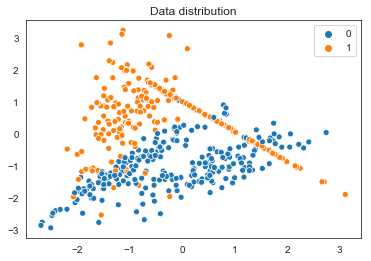

In [3]:
sns.set_style('white')
sns.scatterplot(X[:,1],X[:,2],hue=y.reshape(-1))
plt.title("Data distribution")
plt.show();

### Step 2. Initialize the Parameters
Once we have identified our feature variables, we have an idea how many parameters you need to train. Since we have two feature and one intercept there are three parameters to be trained. The dimension of weight vector is $3\times1$. Initialize the parameters to random values to begin with.

In [4]:
W = np.random.rand(X.shape[1],1)
W

array([[0.78201125],
       [0.27531198],
       [0.98929374]])

### Step 3. Define the loss/cost function that you want to minimize

Just like any other regression solution using gradient descent, we estimate weights by minimizing the cost function. Linear regression uses mean squared error (MSE) as loss function that gives a convex graph, so it is guaranteed to find a global minimum. However, it’s not an option for logistic regression anymore. Since the hypothesis has changed, mean squared error will result in a non-convex graph with no easy to find minimum global point, as seen in the picture below.


    <img src="images/Logistic-1.png" />

This strange outcome is due to the fact that in logistic regression we have the sigmoid function. With the $J(\theta)$ depicted in fig 2, the gradient descent algorithm might get stuck at a local minimum point. That's why we still need a neat convex function as we did for linear regression, hence we use the log loss or cross entropy loss as the cost function for logistic regression.

For logistic regression, the cost function is defined as:
$$\large J(\mathbf{\theta}) = \frac{1}{m} \displaystyle\sum_{i=1}^{m} -y_i \cdot \log(h_\theta(x_i)) - (1-y_i) \cdot log(1-h_\theta(x_i))$$  

This cross-entropy cost function guarantees a convex graph and a global minimum.

<img src="images/Logistic-4.png"/>


In [5]:
def compute_cost(self):
    cost = -self.y*np.log(self.y_proba) - (1-self.y)*np.log(1-self.y_proba)
    loss=np.mean(cost)    
    return loss
    

### Step 4.  Compute the Gradients
Next, we have to calculate the partial derivative of the loss function with respect to each parameter. The calculation of gradient is little complicated for logistic regression but is beautifully explained in this [article](https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d).


$$ \large \frac{\partial J(\mathbf{\theta})}{\partial \theta_j}  =  -\frac{1}{m}\sum_{i=1}^{m}x_j(y^{(i)} - h_\theta^{(i)}(x))) $$

Surprisingly, it looks identical to what we were doing for the multivariate linear regression. What's changed however is the definition of the hypothesis $h_\theta(x)$ function. For linear regression we had $h_\theta(x)=\theta^{T}x$ , whereas for logistic regression we have $h_\theta(x)= \frac{\mathrm{1} }{\mathrm{1} + e^{-\theta^{T}x} }$ .

### Step 5: Update the Parameters


In the final step, we use the gradients to update the parameters. There is still another parameter to consider: the learning rate, denoted by the Greek letter eta (that looks like the letter n), which is the multiplicative factor that we need to apply to the gradient for the parameter update. The learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

$$ \large \theta_j := \theta_j - \eta \frac{\partial J(\mathbf{\theta})}{\partial \theta_j} $$



In [7]:
def update_param(self):
    self.W = self.W - self.lr*np.dot(self.X.T,(self.y-self.y_proba))*(-1/self.n_samples)
    


That's it.The entire algorithm in short is as follows:
> * Initialize parameters with random values
> * LOOP till the stopping criteria is met:
    1. Compute the hypothesis function
    2. Compute loss
    3. Compute partial derivative w.r.t parameters
    4. Update parameters
    5. Repeat

In my [previous post on Linear Regression](https://dasaditi.github.io/Linear-Regression-With-Python/) I have provided pointers on how to determine the stopping criteria.

## The complete Logistic Regression Algorithm in NumPy

Here is the complete implementation of our home-grown Logistic Regression. We will go through 20,000 iterations and use a constant learning rate of 0.03.

In [8]:
#Logistic regression algorithm

class LogisticRegression:
    def __init__(self,X,y,lr=0.03,n_iter=20000):
        self.n_samples = len(y)
        self.W= np.random.rand(X.shape[1],1)
        self.X=X
        self.y=y.reshape(y.shape[0],1)
        self.lr=lr
        self.iter=n_iter
        self.history = np.zeros((n_iter,1))
   
    def sigmoid(self,z):
        return 1.0/(1.0 + np.exp(-z))

    #Compute cost
    def compute_cost(self):
        cost = -self.y*np.log(self.y_proba) - (1-self.y)*np.log(1-self.y_proba)
        loss=np.mean(cost)    
        return loss
    
    #Update the coefficients
    def update_param(self):
        self.W = self.W - self.lr*np.dot(self.X.T,(self.y-self.y_proba))*(-1/self.n_samples)
        
    def fit(self):
        for i in range(self.iter):
            self.y_proba=self.sigmoid(np.dot(self.X,self.W))
            
            loss = self.compute_cost()
            self.history[i]=loss
            self.update_param()
            i=i+1
            
        print("Updated params for logistic regression: ",self.W.reshape(self.W.shape[0],))
     
    def predict(X_predict):        
        y_predict = sigmoid(np.dot(self.X,self.W))
        if y_prob >= 0.5 :
            y_predict = 1
        else :
            y_predict = 0
        return y_predict
    
    def getAllLoss(self):
        return self.history

In [9]:
lr = LogisticRegression(x_train,y_train)
lr.fit()

Updated params for logistic regression:  [ 1.01573796 -0.46994268  1.90845992]


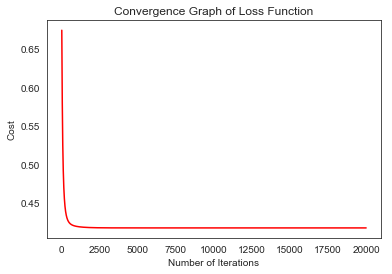

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

history= lr.getAllLoss()
plt.plot(range(len(history)), history, 'r')

plt.title("Convergence Graph of Loss Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

## Comparing Our Implementation with Sklearn's Logistic Regression

We will now run our training data on sklearn logistic regression and compare the results. One thing worth mentioning is logistic regression in sklearn uses a different optimization technique other that gradient descent but it will be interesting to see how it performs in contrast to gradient descent. Since sklearn's logistic regression doesn't use gradient descent it doesn't use learning rate either.  Also, since we had concatenated 1 in our data model, sklearn will treat it as a separate feature and will calculate the coefficient and hence intercept is set to false. And lastly since we haven't used regularization in our own implementation, I will turn off regularization in sklearn implementation too.

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='none',fit_intercept=False,max_iter=20000)

clf.fit(x_train, y_train)
print("updated params for sklearn logistic regression: ",clf.coef_)

updated params for sklearn logistic regression:  [[ 1.01573879 -0.4699424   1.90845942]]


As you see the parameters calculated by our program match with sklearn's model up to 4 digits of decimal. Hurray!!! We will also take a look at the Stochastic Gradient Descent algorithm which is based on gradient descent.

## Comparing Our Implementation with Sklearn's Stochastic Gradient Descent

Stochastic Gradient Descent behaves as Logistic Regression if you pass the loss parameter to 'log'. By default, it updates model parameters after each pass of the training example. I tricked the algorithm to believe that it is running a mini batch but with the entire dataset. That way it's going to be consistent with our implementation. Also, I set the learning rate as 0.03 and number of iteration as 20,000 , same as our implementation.

In [12]:
from sklearn.linear_model import SGDClassifier
sgdclf = SGDClassifier(loss="log", penalty="none", learning_rate='constant',eta0=0.03,fit_intercept=False, max_iter=20000)
for i in range(20000):
    sgdclf.partial_fit(x_train, y_train,np.unique(y_train))

print("updated params for sklearn Stochastic gradient descent classifier: ",sgdclf.coef_)

updated params for sklearn Stochastic gradient descent classifier:  [[ 1.01293211 -0.48921245  1.9178469 ]]


As you see the parameters calculated by SGD is very close to our program even though it is not an exact match.

Happy coding!